In [1]:
#Image Processing Final Project

In [2]:
#Import the libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
#Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
#Get the shape of the arrays
print('x_train shape: ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [6]:
#Take a look at an image as an array
index=33
x_train[index]

array([[[  7,   5,   8],
        [  7,   5,   8],
        [  5,   4,   6],
        ...,
        [ 82,  84,  78],
        [ 80,  85,  81],
        [ 69,  73,  68]],

       [[  6,   4,   8],
        [  6,   4,   9],
        [  5,   3,   8],
        ...,
        [ 85,  86,  77],
        [ 86,  88,  81],
        [ 81,  80,  72]],

       [[  1,   1,   6],
        [  7,   7,  12],
        [  8,   8,  13],
        ...,
        [ 98,  96,  83],
        [ 96,  96,  85],
        [ 86,  84,  73]],

       ...,

       [[150, 153, 139],
        [135, 136, 121],
        [129, 129, 113],
        ...,
        [ 72,  72,  69],
        [ 45,  51,  63],
        [ 26,  32,  51]],

       [[156, 156, 139],
        [153, 151, 130],
        [138, 136, 110],
        ...,
        [ 57,  58,  56],
        [ 23,  32,  48],
        [ 38,  45,  64]],

       [[183, 193, 183],
        [191, 199, 185],
        [182, 189, 171],
        ...,
        [ 83,  83,  76],
        [ 67,  74,  81],
        [114, 120, 119]]

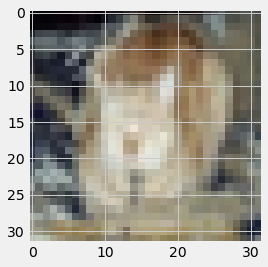

In [7]:
#Show the image as a picture
img=plt.imshow(x_train[index])

In [8]:
#Get the image label
print('The image label is:',y_train[index])

The image label is: [3]


In [9]:
#Get the image classification 
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#Print the image class
print('The image class is: ',classification[y_train[index][0]])

The image class is:  cat


In [10]:
#Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

In [11]:
#Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
#Print the new label of the image/picture above
print('The one hot label is: ',y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [13]:
#Normalize the pixels to be value between 0 and 1
x_train=x_train/255
x_test=x_test/255

In [14]:
x_train[index]

array([[[0.02745098, 0.01960784, 0.03137255],
        [0.02745098, 0.01960784, 0.03137255],
        [0.01960784, 0.01568627, 0.02352941],
        ...,
        [0.32156863, 0.32941176, 0.30588235],
        [0.31372549, 0.33333333, 0.31764706],
        [0.27058824, 0.28627451, 0.26666667]],

       [[0.02352941, 0.01568627, 0.03137255],
        [0.02352941, 0.01568627, 0.03529412],
        [0.01960784, 0.01176471, 0.03137255],
        ...,
        [0.33333333, 0.3372549 , 0.30196078],
        [0.3372549 , 0.34509804, 0.31764706],
        [0.31764706, 0.31372549, 0.28235294]],

       [[0.00392157, 0.00392157, 0.02352941],
        [0.02745098, 0.02745098, 0.04705882],
        [0.03137255, 0.03137255, 0.05098039],
        ...,
        [0.38431373, 0.37647059, 0.3254902 ],
        [0.37647059, 0.37647059, 0.33333333],
        [0.3372549 , 0.32941176, 0.28627451]],

       ...,

       [[0.58823529, 0.6       , 0.54509804],
        [0.52941176, 0.53333333, 0.4745098 ],
        [0.50588235, 0

In [15]:
#Create the models architecture
model=Sequential()

#Add the first layer
model.add(Conv2D(32,(5,5), activation='relu', input_shape=(32,32,3)))

#Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add another convolution layer
model.add(Conv2D(32,(5,5), activation='relu'))

#Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [16]:
#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
#Train the model
hist=model.fit(x_train,y_train_one_hot,
               batch_size=256,
               epochs=10,
               validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 33s 12ms/step - loss: 1.8097 - accuracy: 0.3243 - val_loss: 1.4886 - val_accuracy: 0.4512
Epoch 2/10
157/157 [==============================] - 1s 9ms/step - loss: 1.4285 - accuracy: 0.4782 - val_loss: 1.3445 - val_accuracy: 0.5142
Epoch 3/10
157/157 [==============================] - 1s 9ms/step - loss: 1.2838 - accuracy: 0.5358 - val_loss: 1.2199 - val_accuracy: 0.5613
Epoch 4/10
157/157 [==============================] - 1s 9ms/step - loss: 1.1709 - accuracy: 0.5791 - val_loss: 1.1295 - val_accuracy: 0.5986
Epoch 5/10
157/157 [==============================] - 1s 9ms/step - loss: 1.0846 - accuracy: 0.6148 - val_loss: 1.1173 - val_accuracy: 0.6112
Epoch 6/10
157/157 [==============================] - 1s 9ms/step - loss: 1.0125 - accuracy: 0.6416 - val_loss: 1.0483 - val_accuracy: 0.6276
Epoch 7/10
157/157 [==============================] - 1s 9ms/step - loss: 0.9467 - accuracy: 0.6651 - val_loss: 1.0104 - val_accuracy: 0.6470
Epoc

In [18]:
#Evaluate the model using the test data test
print('Percentage of correct predictions:')
model.evaluate(x_test,y_test_one_hot)[1]

Percentage of correct predictions:
313/313 [==============================] - 1s 3ms/step - loss: 0.9819 - accuracy: 0.6704


0.6704000234603882

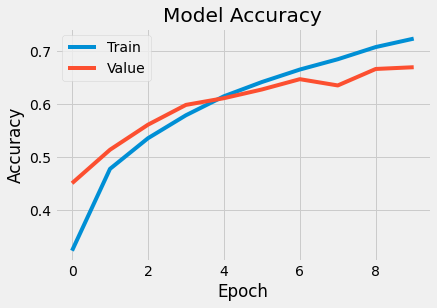

In [19]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Value'], loc='upper left')
plt.show()

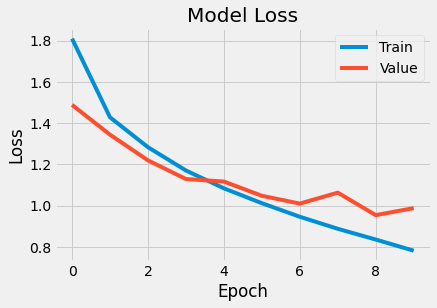

In [20]:
#Visualize the models lose
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Value'], loc='upper right')
plt.show()

In [21]:
#Test the model with examples
from google.colab import files

uploaded=files.upload()
givenTest=next(iter(uploaded))

Saving airplane_1.jpg to airplane_1.jpg


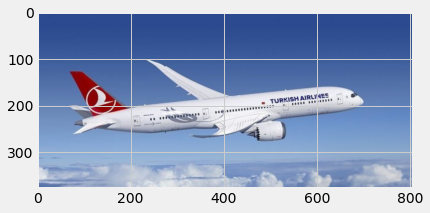

In [22]:
#Show the image
new_image=plt.imread(givenTest)
img=plt.imshow(new_image)

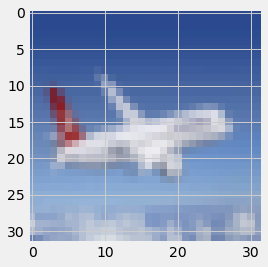

In [23]:
#Resize the image
from skimage.transform import resize

resized_image=resize(new_image,(32,32,3))
img=plt.imshow(resized_image)

In [24]:
#Get the models predictions
predictions=model.predict(np.array([resized_image]))
#Show the predictions
predictions

array([[9.8298162e-01, 1.2431805e-05, 5.8398573e-03, 2.3957642e-04,
        6.4660632e-04, 2.6385256e-05, 1.4323475e-05, 1.5304629e-05,
        1.0186184e-02, 3.7684535e-05]], dtype=float32)

In [25]:
#Sort the predictions from least to greatest
list_index=[0,1,2,3,4,5,6,7,8,9]
x=predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]]>x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp

#Show the sorted labels in order
print(list_index)

[0, 8, 2, 4, 3, 9, 5, 7, 6, 1]


In [26]:
#Print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100,2), '%')

airplane : 98.3 %
ship : 1.02 %
bird : 0.58 %
deer : 0.06 %
cat : 0.02 %


In [27]:
predictedClass=classification[list_index[0]]
givenImageClass=givenTest.split('_')[0]

article='an' if predictedClass[0]=='a' else 'a'
result='true' if predictedClass==givenImageClass else 'false'
print('Given image is probably',article,predictedClass,', prediction is',result)

Given image is probably an airplane , prediction is true
